In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib.collections import LineCollection
from shapely.geometry import Point, Polygon, LineString
from os import path, listdir, getcwd
import matplotlib.pyplot as plt
import json
from shapely.geometry import box
%matplotlib inline


In [73]:
# Parse and plot data
def read_map(city, dir):
    with open(path.join(dir, city + '_nodes.js')) as f:
        lines = f.read().split('=')
        node_dict = json.loads(lines[1])
    nodes = pd.DataFrame([[k, *v] for k, v in node_dict.items()], columns=['node_id', 'x','y'])
    nodes = gpd.GeoDataFrame(nodes, geometry=gpd.points_from_xy(nodes.x, nodes.y), crs=4326)
        
    with open(path.join(dir, city + '_directed.edges')) as f:
        lines = f.read().split('\n') 
    num_nodes, num_edges = [int(x) for x in lines[0].split(' ')]
    assert nodes.shape[0] == num_nodes
    print('Graph with %s nodes and %s edges' % (num_nodes ,num_edges))

    edge_list = [[int(x) for x in line.split()] for line in lines[1:] if len(line) >0]
    edges = pd.DataFrame(edge_list, columns=['u', 'v', 'length'])
    return nodes, edges


def draw_graph(nodes, edges=None):
    fig, ax = plt.subplots(figsize=(16,12))
    nodes_coords = np.array([nodes.x.values, nodes.y.values])
    ax.scatter(*nodes_coords, s=2, marker='o')
    if edges is not None:
        edge_coords = edges.apply(lambda e: [[nodes.iloc[e.u].x, nodes.iloc[e.u].y], 
                                         [nodes.iloc[e.v].x, nodes.iloc[e.v].y]], 
                              axis=1)
        lc = LineCollection(edge_coords, linewidths=0.2, colors='gray')
        ax.add_collection(lc)
    ax.autoscale()
    return ax


def read_instance(filename):
    with open(filename) as f:
        lines = f.read().split('\n')
    # inst_name = lines[0]
    header = [l.lower() for l in lines[5].split()]
    lines = lines[6:]
    # data = [(int(x) for x in line.split()) for line in lines ]
    # the instance has errors, one line had 7 values, for instances w/o errors the oneliner should be enough
    data = []
    for line in lines:
        vals = line.split()
        if len(vals) == 6:
            data.append([int(x) for x in vals])
    df = pd.DataFrame(data, columns=header)
    return df


def plot_trips(trips, nodes):
    ps = pd.DataFrame(trips.groupby('origin').size(), columns=['num_trips']).reset_index()
    ds = pd.DataFrame(trips.groupby('dest').size(), columns=['num_trips']).reset_index()
 
    fig, axes = plt.subplots(ncols=2, figsize=(24, 12))
    p_coords = get_coordinates(nodes, ps.origin)
    axes[0].scatter(*p_coords, c='green', s=ps.num_trips*5)

    d_coords = get_coordinates(nodes, ds.dest)
    axes[1].scatter(*d_coords, c='blue', s=ds.num_trips*5)
    
    
def get_coordinates(nodes, ids):
    return np.array([nodes.iloc[ids].x, nodes.iloc[ids].y])


In [69]:
ROADS = path.join(getcwd(), 'cargo', 'roads') #path to roads folder
CITIES = ['mny', 'bj5', 'cd1']
#Required files: {city}_nodes.js, {city}_directed.edges 

Graph with 12320 nodes and 31444 edges


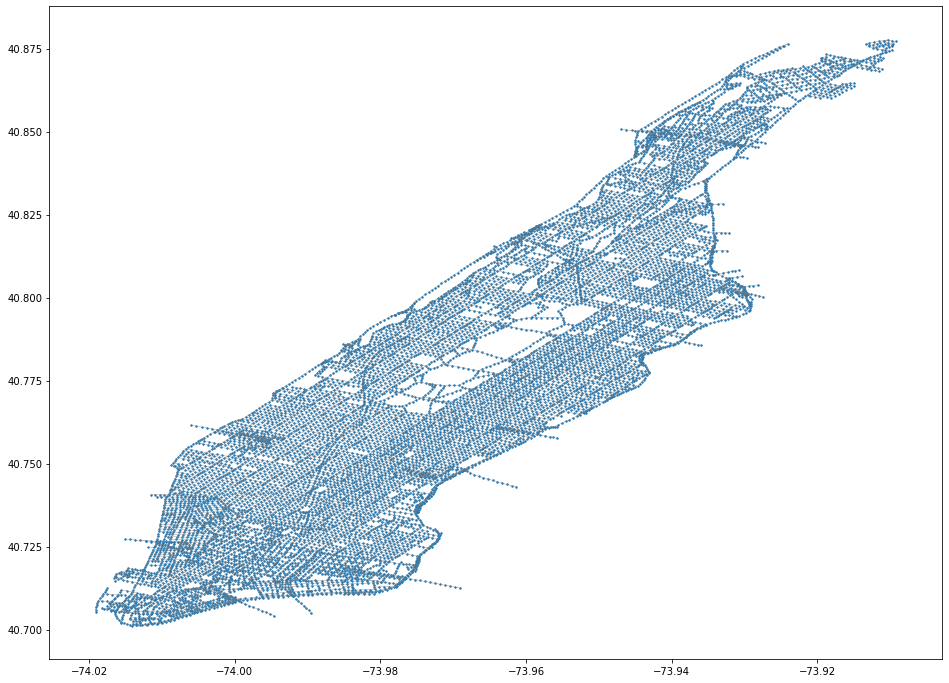

In [70]:
##   Manhattan
mny_nodes, mny_edges = read_map(CITIES[0], ROADS)
draw_graph(mny_nodes, mny_edges)


          id  origin   dest  q  early  late
10000  10001    5345  10857  1      1   904
10001  10002    8190  10835  1      1   437
10002  10003    7697  12153  1      2   486
10003  10004    6261   3571  1      3  1042
10004  10005    1185   9749  1      3   634


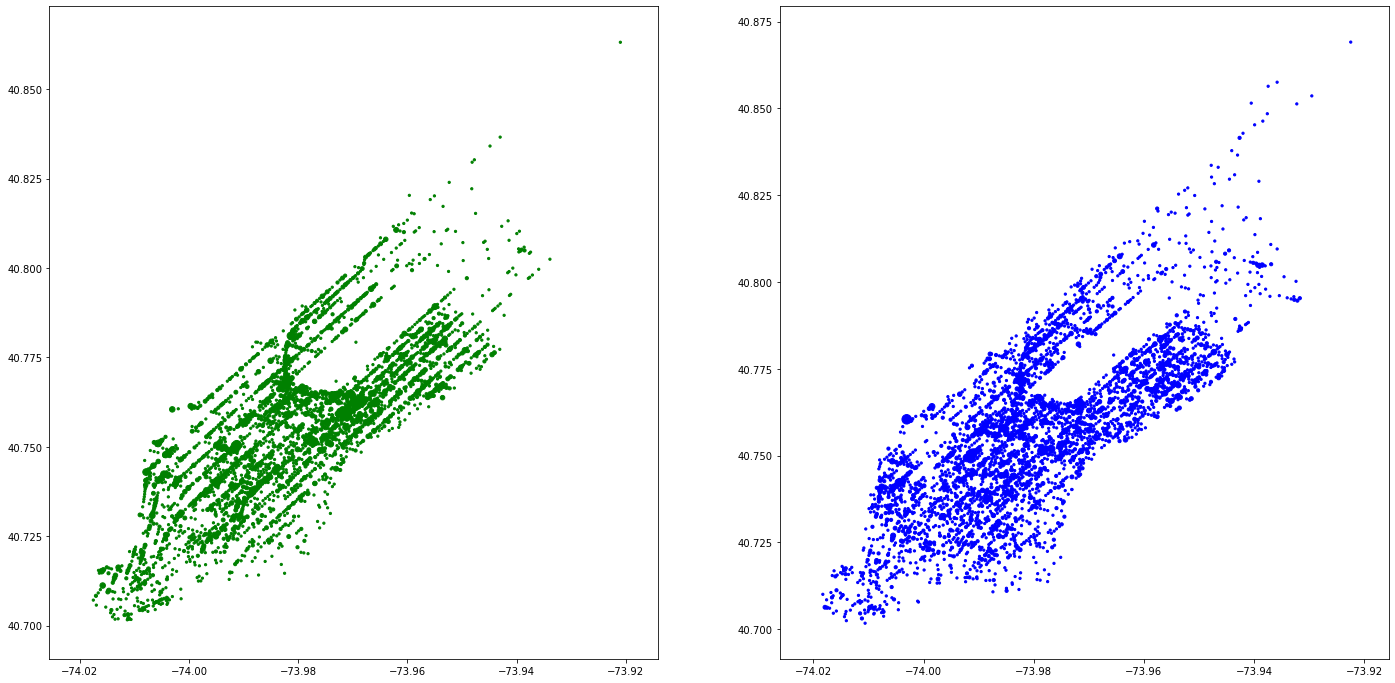

In [74]:
 ## ny, 10.000 cars, capacity 3, delay 6 min, scale 1, s10- speed 10m/s???
 ## 5033 customers 
inst1 = 'rs-mny-m10k-c3-d6-s10-x1.0.instance'
trips1 = read_instance(path.join(getcwd(),'cargo', 'instances', inst1))
trips1 = trips1[trips1.dest >= 0] # m10k, first 10.000 has -1 as dest: smth like initial position for vehicle??
plot_trips(trips1, mny_nodes)
# print(trips1.head(10))



Graph with 351290 nodes and 743822 edges


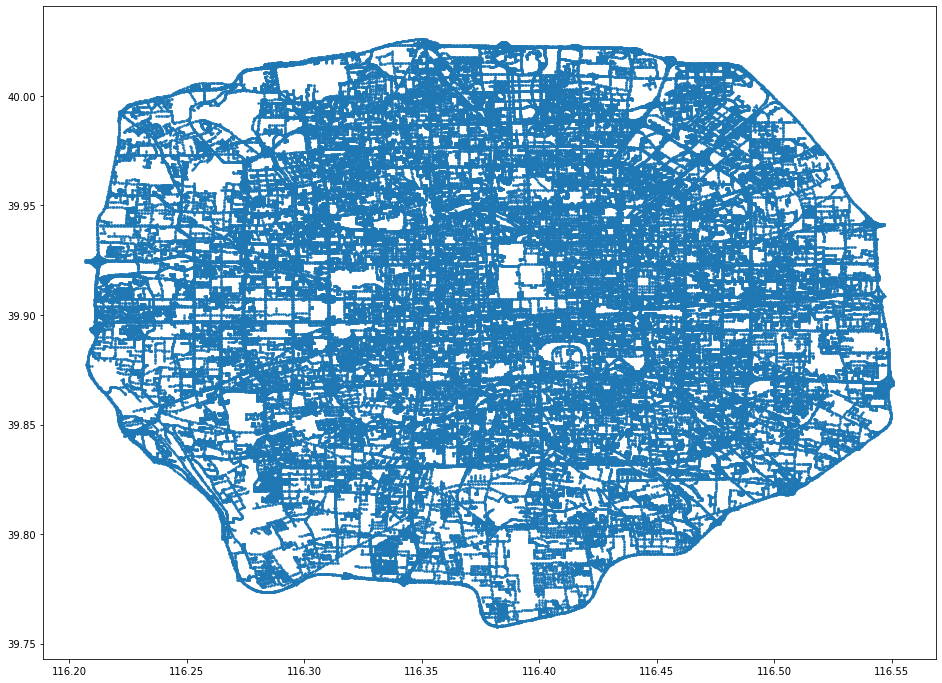

In [75]:
## Beijing 
bj_nodes, bj_edges = read_map(CITIES[1], ROADS)
draw_graph(bj_nodes) # too slow with edges


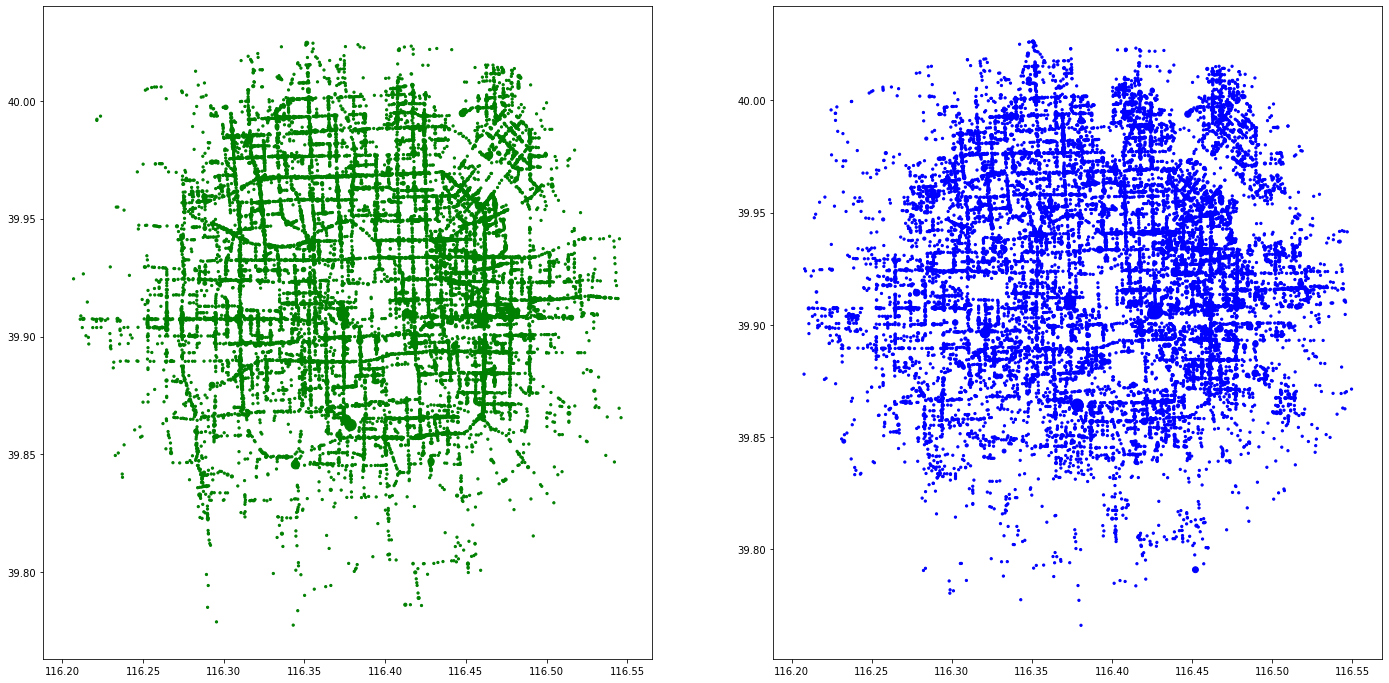

In [77]:
inst2 = 'rs-bj5-m5k-c9-d6-s10-x1.0.instance' 
trips2 = read_instance(path.join(getcwd(),'cargo', 'instances', inst2))
trips2 = trips2[trips2.dest >= 0]  #m5k - 5.000 with dest -1
plot_trips(trips2, bj_nodes)


Graph with 33609 nodes and 73854 edges


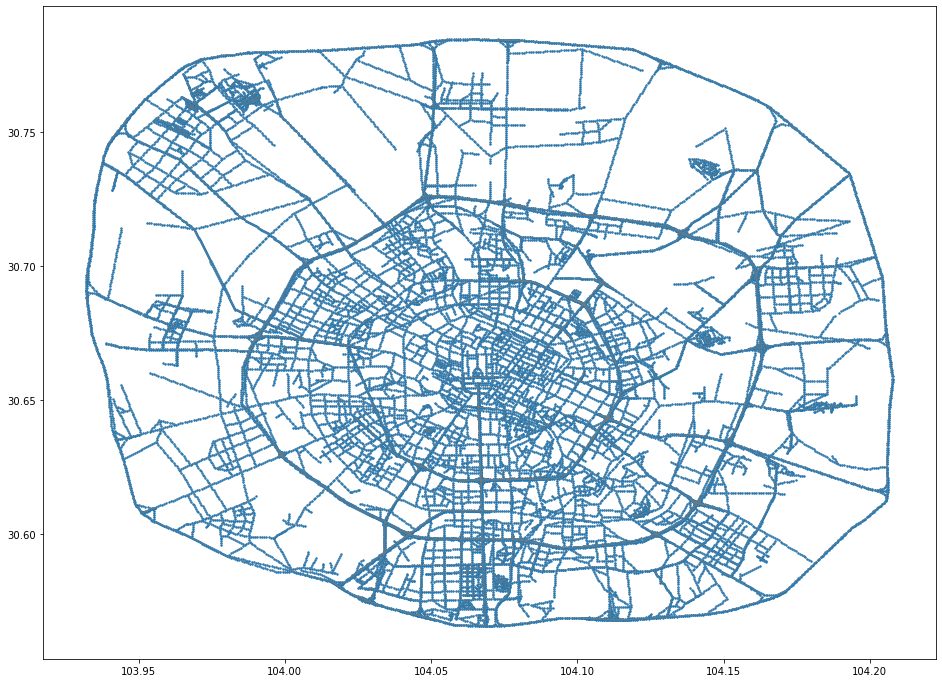

In [78]:
## Chengdu  
cd_nodes, cd_edges = read_map(CITIES[2], ROADS)
draw_graph(cd_nodes, cd_edges)

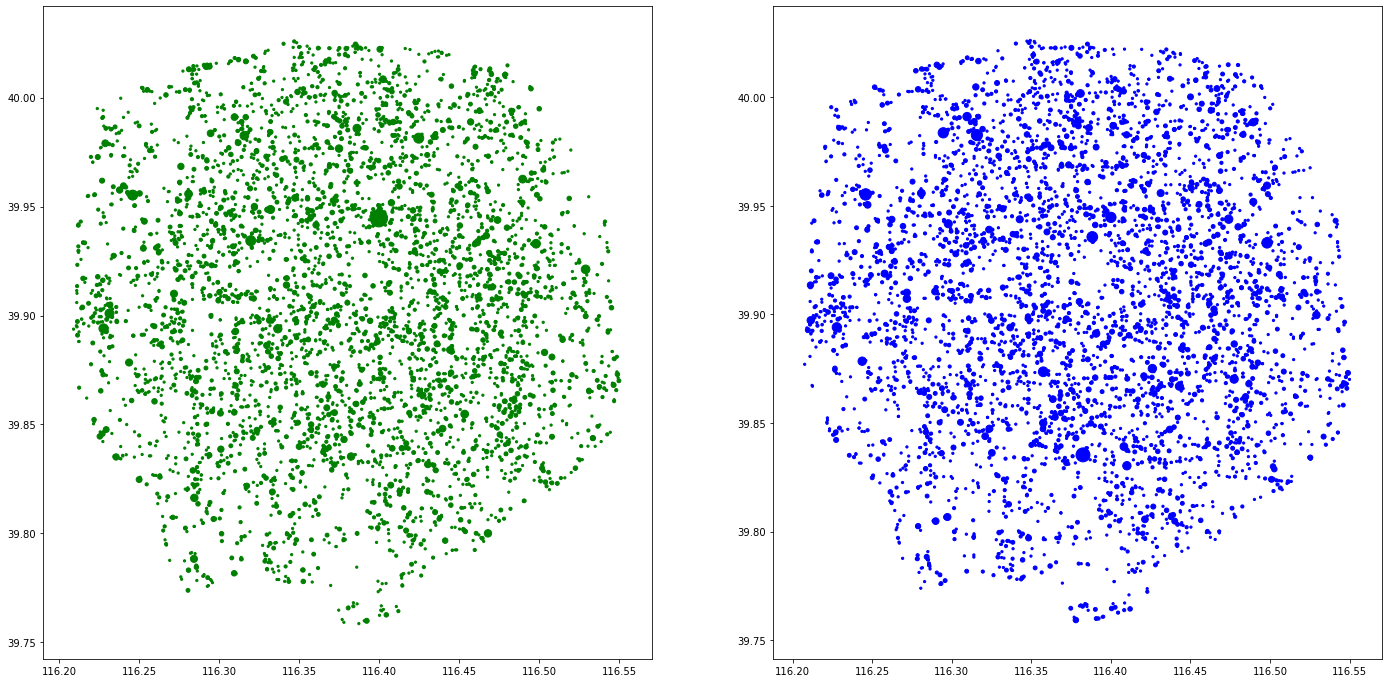

In [79]:
inst3 = 'rs-cd1-m5k-c3-d6-s10-x1.0.instance' 
trips3 = read_instance(path.join(getcwd(),'cargo', 'instances', inst3))
trips3 = trips3[trips3.dest >= 0]  #m5k - 5.000 with dest -1
plot_trips(trips3, bj_nodes)
